<a href="https://colab.research.google.com/github/maticvl/dataHacker/blob/master/pyTorch/007_linearClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

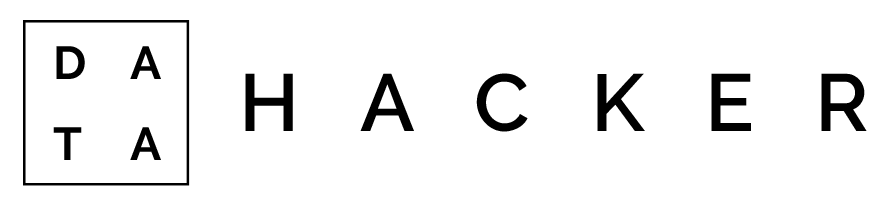
# Linear Classifier

In [ ]:
import torch 
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
x1 = np.array([1, -1, -1], dtype=np.float32)
x2 = np.array([1, 1, -1], dtype=np.float32)
y  = np.array([0, 1, 2])

In [ ]:
x1 = np.repeat(x1, 100)
x2 = np.repeat(x2, 100)
y = np.repeat(y, 100)

In [ ]:
x1 += np.random.randn(len(x1)) * 0.05
x2 += np.random.randn(len(x2)) * 0.05

In [ ]:
index_shuffle = np.arange(len(x1))
np.random.shuffle(index_shuffle)

In [ ]:
x1 = x1[index_shuffle] 
x2 = x2[index_shuffle]
y  = y[index_shuffle]

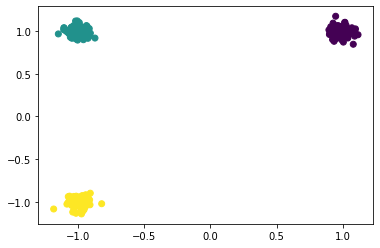

In [ ]:
plt.scatter(x1, x2, c=y)

In [ ]:
x1_torch = torch.from_numpy(x1).view(-1, 1)
x2_torch = torch.from_numpy(x2).view(-1, 1)
y = torch.from_numpy(y).view(-1, 1)

In [ ]:
X = torch.hstack([x1_torch, x2_torch])

In [ ]:
X_train = X[:250, :]
X_test  = X[250:, :]
y_train = y[:250, :]
y_test  = y[250:, :]

In [ ]:
X_train.shape

torch.Size([250, 2])

In [ ]:
class LinearClassifier(torch.nn.Module):
  def __init__(self, input_dim=2, output_dim=3):
    super(LinearClassifier, self).__init__()
    self.linear = torch.nn.Linear(input_dim, output_dim)
  
  def forward(self, x):
    return self.linear(x)

In [ ]:
model = LinearClassifier()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
all_loss = []

In [ ]:
for epoch in range(10000):
  output = model(X_train)

  loss = criterion(output, y_train.view(-1))
  all_loss.append(loss.item())
  loss.backward()

  optimizer.step()
  optimizer.zero_grad()

In [ ]:
model.forward(torch.tensor([1., 1.]))

tensor([ 4.3774, -0.3373, -3.5930], grad_fn=<AddBackward0>)

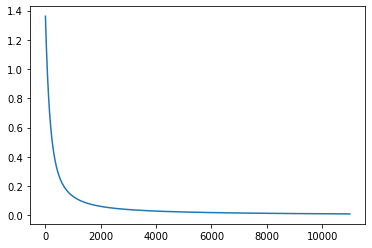

In [ ]:
plt.plot(all_loss)

In [ ]:
w, b = model.parameters()
print(w)

Parameter containing:
tensor([[ 2.9150,  1.3274],
        [-1.9939,  2.0270],
        [-1.0027, -2.9086]], requires_grad=True)


In [ ]:
w = w.detach().numpy()
b = b.detach().numpy()

In [ ]:
x1_fit = np.linspace(-1, 1, 100)
x2_fit = np.linspace(-1, 1, 100)

In [ ]:
y1_fit = ( - x1_fit*w[0,0] - b[0] ) / w[0,1]
y2_fit = ( - x1_fit*w[1,0] - b[1] ) / w[1,1]
y3_fit = ( - x1_fit*w[2,0] - b[2] ) / w[2,1]

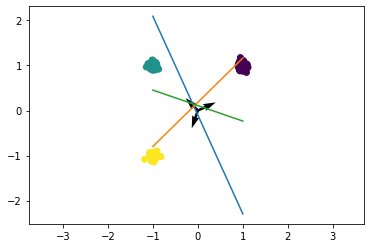

In [ ]:
plt.scatter(x1, x2, c=y)
plt.plot(x1_fit, y1_fit)
plt.plot(x1_fit, y2_fit)
plt.plot(x1_fit, y3_fit)
plt.quiver(np.array([0, 0, 0]), np.array([0, 0, 0]), w[:, 0], w[:, 1])

plt.axis('equal')

In [ ]:
x1_fit = np.linspace(-3, 3, 20)
x2_fit = np.linspace(-3, 3, 20)

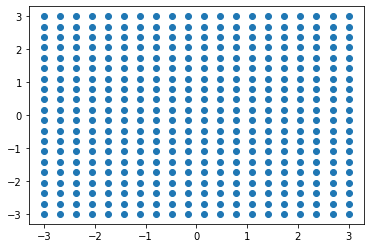

In [ ]:
meshgrid = np.meshgrid(x1_fit, x2_fit)
plt.scatter(meshgrid[0], meshgrid[1])

In [ ]:
X = np.hstack([meshgrid[0].reshape(-1, 1), meshgrid[1].reshape(-1, 1)])
X = X.astype(np.float32)
X_torch = torch.from_numpy(X)

In [ ]:
print(X_torch.shape)

torch.Size([400, 2])


In [ ]:
y_pred = model.forward(X_torch)

In [ ]:
print(y_pred.shape)

torch.Size([400, 3])


In [ ]:
y_pred = torch.argmax(y_pred, axis=1)

In [ ]:
print(y_pred.shape)

torch.Size([400])


In [ ]:
print(y_pred)

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

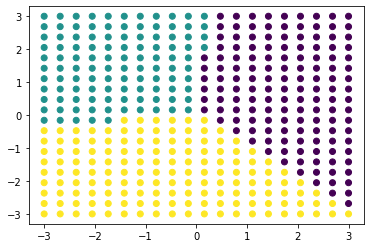

In [ ]:
plt.scatter(X_torch[:, 0], X_torch[:, 1], c=y_pred.detach().numpy())

In [ ]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize([0.1307], [0.3081])
])

In [ ]:
trainset = torchvision.datasets.MNIST(root='./data', download=True, train=True , transform=transform)
testset  = torchvision.datasets.MNIST(root='./data', download=True, train=False, transform=transform)

In [ ]:
trainLoader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testLoader  = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)

In [ ]:
classes = np.arange(0, 10, 1)

In [ ]:
dataiter = iter(trainLoader)
images, labels = dataiter.next()

In [ ]:
def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


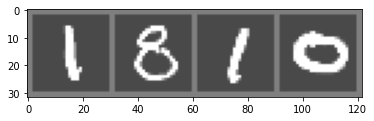

In [ ]:
imshow(torchvision.utils.make_grid(images))

In [ ]:
print(labels)

tensor([7, 3, 8, 0])


In [ ]:
model = LinearClassifier(28*28, 10)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [ ]:
all_loss = []

for epoch in range(10):

  temp_loss = []

  for images, labels in trainLoader:
    output = model(images.view(images.shape[0], -1))

    loss = criterion(output, labels)
    loss.backward()

    temp_loss.append(loss.item())

    optimizer.step()
    optimizer.zero_grad()
  
  all_loss.append(np.mean(temp_loss))
  print(f"Epoch: {epoch}, loss: {np.mean(temp_loss)}")

Epoch: 0, loss: 0.422779010532548
Epoch: 1, loss: 0.3165135584906442
Epoch: 2, loss: 0.29943322980460557
Epoch: 3, loss: 0.2901047709106196
Epoch: 4, loss: 0.28431303392786844
Epoch: 5, loss: 0.27965582165470115
Epoch: 6, loss: 0.2763478965909783
Epoch: 7, loss: 0.2733405952781633
Epoch: 8, loss: 0.27101428845680103
Epoch: 9, loss: 0.2688760106117203


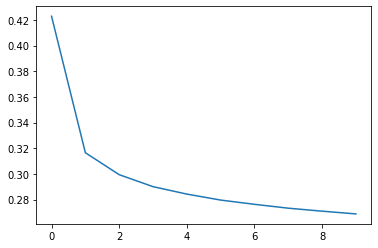

In [ ]:
plt.plot(all_loss)

In [ ]:
correct, total = 0, 0

with torch.no_grad():

  for images, labels in testLoader:
    output = model(images.view(images.shape[0], -1))

    _, predicted = torch.max(output.data, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

In [ ]:
100 * correct / total

92.24

In [ ]:
class_correct = list(0. for i in range(10))
class_total   = list(0. for i in range(10))

In [ ]:
with torch.no_grad():
  for images, labels in testLoader:
    output = model(images.view(images.shape[0], -1))
    _, predicted = torch.max(output.data, 1)

    c = (predicted == labels).squeeze()

    for i in range(4):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1

In [ ]:
for i in range(10):
  print(f"Accuracy of {classes[i]}: {100 * class_correct[i] / class_total[i]}")

Accuracy of 0: 97.75510204081633
Accuracy of 1: 97.79735682819383
Accuracy of 2: 89.34108527131782
Accuracy of 3: 91.18811881188118
Accuracy of 4: 93.58452138492872
Accuracy of 5: 85.65022421524664
Accuracy of 6: 95.61586638830897
Accuracy of 7: 92.21789883268482
Accuracy of 8: 88.91170431211499
Accuracy of 9: 89.197224975223


In [ ]:
w, b = model.parameters()

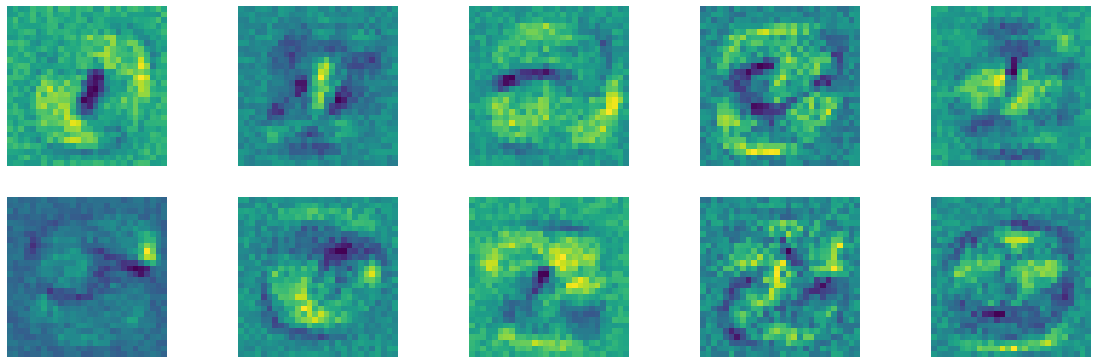

In [ ]:
plt.figure(figsize=(20, 17))
for i, data in enumerate(w):
  plt.subplot(5, 5, i+1)
  plt.imshow(data.detach().reshape(28, 28))
  plt.axis('off')

In [ ]:
idx_0 = testset.train_labels==0
idx_1 = testset.train_labels==1
idx_8 = testset.train_labels==8
zero = testset.train_data[idx_0]
one = testset.train_data[idx_1]
eight = testset.train_data[idx_8]

zero = zero[15].clone()
one = one[20].clone()
eight = eight[24].clone()

zero = transform(transforms.ToPILImage()(zero))
one = transform(transforms.ToPILImage()(one))
eight = transform(transforms.ToPILImage()(eight))

three_class_data = torch.stack([zero, one, eight])

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


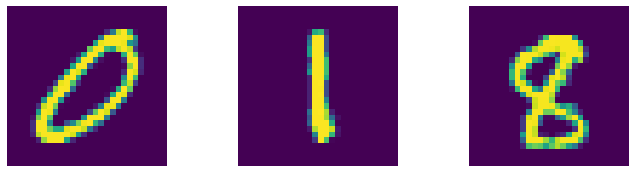

In [ ]:
plt.figure(figsize=(20, 17))
for i, data in enumerate(three_class_data):
    plt.subplot(5, 5, i+1)
    plt.imshow(data.cpu().detach().reshape(28, 28))
    plt.axis('off')
plt.show()

In [ ]:
imgs = torch.stack([img_t for img_t, _ in trainset], dim=3)
min_ = imgs.view(1, -1).min(dim=1).values[0]
max_ = imgs.view(1, -1).max(dim=1).values[0]

In [ ]:
changeup = np.linspace(min_, max_, 256)

In [ ]:
w_class = torch.vstack([w[0], w[1], w[8]])
b_class = torch.vstack([b[0], b[1], b[8]])

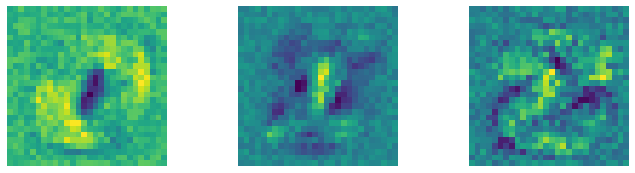

In [ ]:
plt.figure(figsize=(20, 17))
for i, data in enumerate(w_class):
    plt.subplot(5, 5, i+1)
    plt.imshow(data.cpu().detach().reshape(28, 28))
    plt.axis('off')
plt.show()

In [ ]:
data_0 = np.zeros((256))
data_1 = np.zeros((256))
data_8 = np.zeros((256))

for i in range(len(changeup)):
  reshaped = eight.reshape(28, 28, 1)
  reshaped[12, 15] = changeup[i]

  data_0[i] = ((torch.sum(w_class[0] * reshaped.reshape(-1)) + b_class[0]).cpu().detach().numpy())
  data_1[i] = ((torch.sum(w_class[1] * reshaped.reshape(-1)) + b_class[1]).cpu().detach().numpy())
  data_8[i] = ((torch.sum(w_class[2] * reshaped.reshape(-1)) + b_class[2]).cpu().detach().numpy())

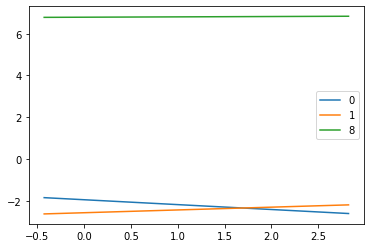

In [ ]:
plt.plot(changeup, data_0)
plt.plot(changeup, data_1)
plt.plot(changeup, data_8)

plt.legend(['0', '1', '8'])

In [ ]:
data_0 = np.zeros((256, 256))
data_1 = np.zeros((256, 256))
data_8 = np.zeros((256, 256))

for i in range(len(changeup)):
  reshaped = eight.reshape(28, 28, 1).float()

  reshaped[12, 15] = changeup[i]
  for j in range(len(changeup)):
    reshaped[17, 14] = changeup[j]

    data_0[i, j] = ((torch.sum(w_class[0] * reshaped.reshape(-1)) + b_class[0]).cpu().detach().numpy())
    data_1[i, j] = ((torch.sum(w_class[1] * reshaped.reshape(-1)) + b_class[1]).cpu().detach().numpy())
    data_8[i, j] = ((torch.sum(w_class[2] * reshaped.reshape(-1)) + b_class[2]).cpu().detach().numpy())

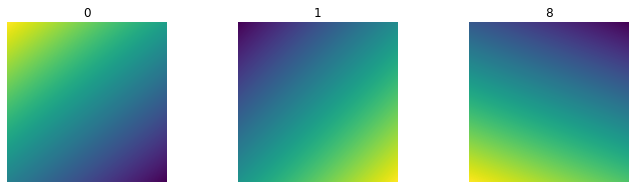

In [ ]:
combined = np.array([data_0, data_1, data_8])
class_names = ['0', '1', '8']

plt.figure(figsize=(20, 17))
for i, data in enumerate(combined):
  
    plt.subplot(5, 5, i+1)
    plt.imshow(data)
    plt.title(class_names[i])
    plt.axis('off')

plt.show()